In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evds import evdsAPI
from datetime import date

In [326]:
evds=evdsAPI('dsIC3fiGlu')


In [327]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd

,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.3263
1,02-02-2006,1.3241
2,03-02-2006,1.3277
3,06-02-2006,1.3257
4,07-02-2006,1.3296
...,...,...
4599,19-09-2023,27.0300
4600,20-09-2023,27.0424
4601,21-09-2023,27.0396
4602,22-09-2023,27.0507


In [328]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

# Sonucu görüntüle
usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [329]:
enf=evds.get_data(["TP.FG.J0"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FG_J0
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
206,2023-4,1300.04
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84


In [330]:
inflation=enf
inflation=pd.DataFrame(inflation)
inflation.columns=["Tarih","TÜFE"]


In [331]:

inflationagt=pd.DataFrame.from_dict({'Tarih':"2023-9",'TÜFE': [1717]})
inflation=pd.concat([inflation,inflationagt],axis=0)
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
207,2023-5,1300.60
208,2023-6,1351.59
209,2023-7,1479.84
210,2023-8,1614.31


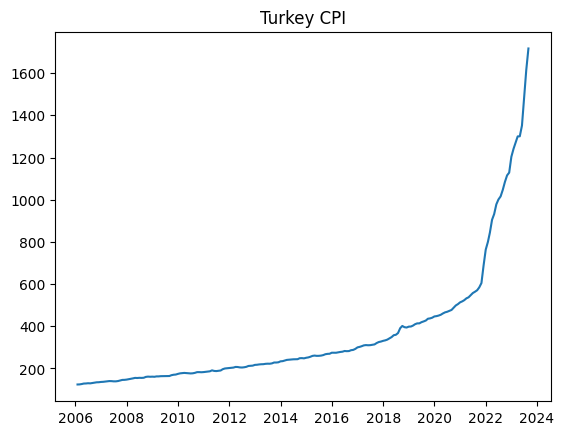

In [332]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure()
plt.title("Turkey CPI")

plt.plot(df)
plt.show()


In [333]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-05-31,19.719514
2023-06-30,23.106042
2023-07-31,26.470338


In [334]:
dates= pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)


df6

,USD/TL
2006-02-01,1.326535
2006-03-01,1.335139
2006-04-01,1.337345
2006-05-01,1.420659
2006-06-01,1.600536
...,...
2023-05-01,19.719514
2023-06-01,23.106042
2023-07-01,26.470338
2023-08-01,26.999127


In [335]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np



# Modeli eğitim verisi üzerinde eğitme
model = ARIMA(df6["USD/TL"], order=(1,1,2))
# Modeli tekrar eğitim verisi üzerinde eğitme
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12)
predictions = forecast.values

predictions

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


array([27.32829792, 27.89160734, 28.45237474, 29.01061157, 29.56632925,
       30.11953917, 30.67025262, 31.21848089, 31.76423517, 32.30752665,
       32.84836642, 33.38676556])

In [336]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(df6['USD/TL'], order=(1,1,2))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

optimal_future_forecast


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-10-01    27.328298
2023-11-01    27.891607
2023-12-01    28.452375
2024-01-01    29.010612
2024-02-01    29.566329
2024-03-01    30.119539
2024-04-01    30.670253
2024-05-01    31.218481
2024-06-01    31.764235
2024-07-01    32.307527
2024-08-01    32.848366
2024-09-01    33.386766
Freq: MS, Name: predicted_mean, dtype: float64

In [337]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
train_data = df6['USD/TL'][:len(df6)-12]
test_data = df6['USD/TL'][len(df6)-12:]


ar_model = AutoReg(train_data, lags=12)
ar_fit = ar_model.fit()
ar_forecast = ar_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
print(np.sqrt(mean_squared_error(test_data, ar_forecast)))





1.6367876286779313


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [338]:
# AR modeli ile tüm veri seti üzerinde eğitim
full_ar_model = AutoReg(df6['USD/TL'], lags=12)
full_ar_fit = full_ar_model.fit()

# Önümüzdeki 12 ay için tahmin yapma
full_ar_forecast = full_ar_fit.predict(start=len(df6), end=len(df6)+11)

usdtahmin=full_ar_forecast
usdtahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2023-10-01    27.565702
2023-11-01    28.671054
2023-12-01    30.345321
2024-01-01    31.753305
2024-02-01    32.941346
2024-03-01    33.959402
2024-04-01    34.519157
2024-05-01    34.871071
2024-06-01    35.726666
2024-07-01    37.436184
2024-08-01    39.580918
2024-09-01    41.410461
Freq: MS, dtype: float64

In [339]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
money

,Tarih,TP_PR_ARZ13
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [340]:
#Cleaning the data

money_supply=pd.DataFrame(money)
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
0,2006-2,2.423895e+08
1,2006-3,2.494857e+08
2,2006-4,2.521919e+08
3,2006-5,2.751947e+08
4,2006-6,2.791388e+08
...,...,...
207,2023-5,9.409317e+09
208,2023-6,1.083453e+10
209,2023-7,1.147848e+10
210,2023-8,1.202532e+10


In [341]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame(money_supply)
del dfn["Tarih"]
dfn


,Para Arzi
2006-02-01,2.423895
2006-03-01,2.494857
2006-04-01,2.521919
2006-05-01,2.751947
2006-06-01,2.791388
...,...
2023-05-01,94.093167
2023-06-01,108.345324
2023-07-01,114.784753
2023-08-01,120.253199


In [342]:
brent=evds.get_data(["TP.BRENTPETROL.EUBP"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
brent

,Tarih,TP_BRENTPETROL_EUBP
0,01-02-2006,65.64
1,02-02-2006,63.49
2,03-02-2006,62.54
3,06-02-2006,63.32
4,07-02-2006,61.64
...,...,...
4594,12-09-2023,93.58
4595,13-09-2023,93.04
4596,14-09-2023,95.20
4597,15-09-2023,95.55


In [343]:
brent['Tarih'] = pd.to_datetime(brent['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
brent.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
brent = brent.resample('M').mean()

# Sonucu görüntüle
brent

,TP_BRENTPETROL_EUBP
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [344]:

brent1=pd.DataFrame(brent)
brent1.columns=["Brent"]
brent1


,Brent
Tarih,
2006-02-28,60.210000
2006-03-31,62.064783
2006-04-30,70.260000
2006-05-31,69.776957
2006-06-30,68.555909
...,...
2023-05-31,75.466000
2023-06-30,74.839091
2023-07-31,80.108095


In [345]:
df14=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)

df14["Brent"]=brent1["Brent"]
df14["TIME"]=dates
df14['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df14 = df14.set_index(['TIME'])
df14

C:\Users\Bora\AppData\Local\Temp\ipykernel_7312\3566834801.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df14['TIME'] =  pd.to_datetime(df14['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,60.210000
2006-03-01,62.064783
2006-04-01,70.260000
2006-05-01,69.776957
2006-06-01,68.555909
...,...
2023-05-01,75.466000
2023-06-01,74.839091
2023-07-01,80.108095


In [346]:
# Modeli eğitim verisi üzerinde eğitme
model = ARIMA(df14["Brent"], order=(4,1,2))
# Modeli tekrar eğitim verisi üzerinde eğitme
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12)
predictions = forecast.values

brenttahmin=predictions
brenttahmin

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppDa

array([92.21624117, 90.09533947, 92.4407916 , 94.28531586, 91.67142469,
       90.71083144, 93.52121299, 93.64445095, 90.91044387, 91.57888097,
       94.01503141, 92.67236792])

In [347]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
kredi

,Tarih,TP_KREDI_L001
0,2006-2,1.381847e+08
1,2006-3,1.481222e+08
2,2006-4,1.527510e+08
3,2006-5,1.664881e+08
4,2006-6,1.740395e+08
...,...,...
207,2023-5,8.804344e+09
208,2023-6,9.564604e+09
209,2023-7,9.846895e+09
210,2023-8,9.923806e+09


In [348]:
dates=pd.date_range('2006-02-01','2023-10-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=pd.DataFrame(kredi)
kredi.columns=["Tarih","Kredi"]
kredi["Kredi"]=kredi["Kredi"]/1e+08
kredi

,Tarih,Kredi
0,2006-2,1.381847
1,2006-3,1.481222
2,2006-4,1.527510
3,2006-5,1.664881
4,2006-6,1.740395
...,...,...
207,2023-5,88.043441
208,2023-6,95.646045
209,2023-7,98.468952
210,2023-8,99.238055


In [349]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\Bora\AppData\Local\Temp\ipykernel_7312\2513009782.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,1.381847
2006-03-01,1.481222
2006-04-01,1.527510
2006-05-01,1.664881
2006-06-01,1.740395
...,...
2023-05-01,88.043441
2023-06-01,95.646045
2023-07-01,98.468952


In [350]:
faiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
faiz=faiz.set_index(dates)
del faiz["Tarih"]
faiz.columns=["Faiz"]
faiz

,Faiz
2006-02-01,17.297500
2006-03-01,17.008000
2006-04-01,16.207500
2006-05-01,16.300000
2006-06-01,19.670000
...,...
2023-05-01,32.022500
2023-06-01,38.560000
2023-07-01,45.825000
2023-08-01,45.765000


In [351]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(faiz, order=(1,1,0))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

faiztahmin=optimal_future_predictions
faiztahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


array([60.73272319, 63.44224439, 64.86610488, 65.61434729, 66.00755064,
       66.21418003, 66.32276431, 66.37982564, 66.40981151, 66.42556917,
       66.43384986, 66.43820138])

In [352]:
# En uygun parametrelerle ARIMA modelini eğitme
optimal_model = ARIMA(df3["Kredi"], order=(2,1,2))
optimal_model_fit = optimal_model.fit()

# Gelecek 12 ay için tahmin yapma
optimal_future_forecast = optimal_model_fit.forecast(steps=12)
optimal_future_predictions = optimal_future_forecast.values

kreditahmin=optimal_future_predictions
kreditahmin


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


array([103.0974041 , 105.86037436, 108.39632237, 111.02004341,
       113.58815461, 116.16605795, 118.72401495, 121.27564095,
       123.81479536, 126.34433978, 128.86303341, 131.37150459])

In [353]:
X=pd.concat([df6["USD/TL"],df14.Brent,df3.Kredi,faiz],axis=1)



In [354]:
y=pd.DataFrame(df["CPI"])
y["CPI"]=y["CPI"].astype(float)
y


,CPI
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.20
2006-06-01,128.63
...,...
2023-05-01,1300.60
2023-06-01,1351.59
2023-07-01,1479.84
2023-08-01,1614.31


In [355]:
X["TÜFE"]=y["CPI"]
data=X
data

,USD/TL,Brent,Kredi,Faiz,TÜFE
2006-02-01,1.326535,60.210000,1.381847,17.297500,123.84
2006-03-01,1.335139,62.064783,1.481222,17.008000,124.18
2006-04-01,1.337345,70.260000,1.527510,16.207500,125.84
2006-05-01,1.420659,69.776957,1.664881,16.300000,128.20
2006-06-01,1.600536,68.555909,1.740395,19.670000,128.63
...,...,...,...,...,...
2023-05-01,19.719514,75.466000,88.043441,32.022500,1300.60
2023-06-01,23.106042,74.839091,95.646045,38.560000,1351.59
2023-07-01,26.470338,80.108095,98.468952,45.825000,1479.84
2023-08-01,26.999127,86.147727,99.238055,45.765000,1614.31


In [356]:
import pandas as pd
from sklearn.linear_model import LinearRegression



# Hareketli pencere boyutunu belirleyin
window_size = 12  # Örnek olarak 12 aylık bir pencere

# Hareketli pencere regresyonunu uygulama
results = []  # Tahmin sonuçlarını saklamak için bir liste

for i in range(len(data) - window_size + 1):
    window_data = data[i:i+window_size]  # Hareketli pencereyi seçin
    
    # Regresyon modelini oluşturun
    X = window_data[["USD/TL","Brent","Kredi","Faiz"]]  # Bağımsız değişkenler
    y = window_data['TÜFE']  # Hedef değişken
    
    model = LinearRegression()
    model.fit(X, y)  # Modeli eğitin
    
    # Tahmin yapın
    last_observation = data.iloc[i + window_size - 1][["USD/TL","Brent","Kredi","Faiz"]].values.reshape(1, -1)
    prediction = model.predict(last_observation)
    
    results.append(prediction[0])  # Tahmin sonucunu listeye ekleyin

# Tahmin sonuçlarını bir veri çerçevesine ekleyin
results_df = pd.DataFrame({'Tahmin': results})

# Orijinal veri ile tahminleri birleştirin
final_df = pd.concat([data, results_df], axis=1)

# Sonucu görüntüleme
print(final_df)


c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegressi

                       USD/TL      Brent     Kredi     Faiz    TÜFE  \
2006-02-01 00:00:00  1.326535  60.210000  1.381847  17.2975  123.84   
2006-03-01 00:00:00  1.335139  62.064783  1.481222  17.0080  124.18   
2006-04-01 00:00:00  1.337345  70.260000  1.527510  16.2075  125.84   
2006-05-01 00:00:00  1.420659  69.776957  1.664881  16.3000  128.20   
2006-06-01 00:00:00  1.600536  68.555909  1.740395  19.6700  128.63   
...                       ...        ...       ...      ...     ...   
196                       NaN        NaN       NaN      NaN     NaN   
197                       NaN        NaN       NaN      NaN     NaN   
198                       NaN        NaN       NaN      NaN     NaN   
199                       NaN        NaN       NaN      NaN     NaN   
200                       NaN        NaN       NaN      NaN     NaN   

                          Tahmin  
2006-02-01 00:00:00          NaN  
2006-03-01 00:00:00          NaN  
2006-04-01 00:00:00          NaN  
2006-05

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegressi

In [357]:
data=data.iloc[11:]
data

,USD/TL,Brent,Kredi,Faiz,TÜFE
2007-01-01,1.426660,53.681429,1.934805,23.727500,135.84
2007-02-01,1.396940,57.555789,1.931193,23.032500,136.42
2007-03-01,1.409632,62.050455,1.998175,22.398000,137.67
2007-04-01,1.361815,67.485789,2.032833,21.660000,139.33
2007-05-01,1.338283,67.212273,2.058730,21.250000,140.03
...,...,...,...,...,...
2023-05-01,19.719514,75.466000,88.043441,32.022500,1300.60
2023-06-01,23.106042,74.839091,95.646045,38.560000,1351.59
2023-07-01,26.470338,80.108095,98.468952,45.825000,1479.84
2023-08-01,26.999127,86.147727,99.238055,45.765000,1614.31


In [358]:
results_df=results_df.set_index(data.index) 
results_df

,Tahmin
2007-01-01,135.629442
2007-02-01,135.877535
2007-03-01,137.363764
2007-04-01,139.030010
2007-05-01,139.910619
...,...
2023-05-01,1313.407615
2023-06-01,1353.334742
2023-07-01,1459.925302
2023-08-01,1573.489483


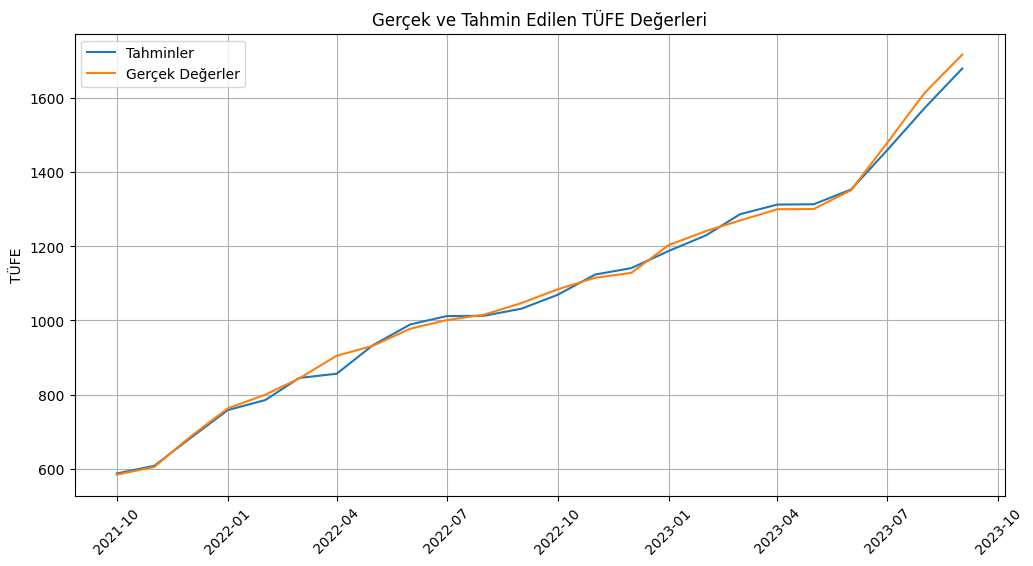

In [359]:
import matplotlib.pyplot as plt

# Orijinal veri ile tahminleri birleştirin (results_df ve data kullanıldı)
final_df = pd.concat([data, results_df], axis=1)

# Tahmin ve gerçek değerleri karşılaştırın
plt.figure(figsize=(12, 6))
plt.plot(results_df['Tahmin'].tail(24), label='Tahminler')
plt.plot(data['TÜFE'].tail(24), label='Gerçek Değerler')

plt.ylabel('TÜFE')
plt.title('Gerçek ve Tahmin Edilen TÜFE Değerleri')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [360]:
forecast=pd.DataFrame()
forecast["USD/TL Tahmin"]=usdtahmin
forecast["Brent Tahmin"]=brenttahmin
forecast["Kredi Tahmin"]=kreditahmin   
forecast["Faiz Tahmin"]=faiztahmin

forecast.columns=["USD/TL","Brent","Kredi","Faiz"]
forecast

,USD/TL,Brent,Kredi,Faiz
2023-10-01,27.565702,92.216241,103.097404,60.732723
2023-11-01,28.671054,90.095339,105.860374,63.442244
2023-12-01,30.345321,92.440792,108.396322,64.866105
2024-01-01,31.753305,94.285316,111.020043,65.614347
2024-02-01,32.941346,91.671425,113.588155,66.007551
2024-03-01,33.959402,90.710831,116.166058,66.214180
2024-04-01,34.519157,93.521213,118.724015,66.322764
2024-05-01,34.871071,93.644451,121.275641,66.379826
2024-06-01,35.726666,90.910444,123.814795,66.409812
2024-07-01,37.436184,91.578881,126.344340,66.425569


In [361]:


# Gelecek 12 ay için tahminler yapın
future_predictions = model.predict(forecast.head(16))

# Tahmin sonuçlarını görüntüleme
print("Gelecek 12 Ay için TÜFE Tahminleri:")
print(future_predictions)


Gelecek 12 Ay için TÜFE Tahminleri:
[1721.33684079 1749.80947809 1808.04695979 1862.46390728 1878.48333686
 1908.36242509 1970.08150675 2009.58801866 2024.00898593 2064.93256018
 2119.55228749 2143.11448845]


In [362]:
future_predictions=pd.DataFrame(future_predictions)
future_predictions=future_predictions.set_index(pd.date_range(start='2023-09-01', periods=12, freq='M'))
future_predictions.columns=["TÜFE"]
future_predictions

,TÜFE
2023-09-30,1721.336841
2023-10-31,1749.809478
2023-11-30,1808.046960
2023-12-31,1862.463907
2024-01-31,1878.483337
2024-02-29,1908.362425
2024-03-31,1970.081507
2024-04-30,2009.588019
2024-05-31,2024.008986
2024-06-30,2064.932560


In [363]:
tüfe=pd.concat([data,future_predictions])
tüfe=tüfe.drop("2023-09-01 00:00:00")
tüfe


,USD/TL,Brent,Kredi,Faiz,TÜFE
2007-01-01,1.426660,53.681429,1.934805,23.7275,135.840000
2007-02-01,1.396940,57.555789,1.931193,23.0325,136.420000
2007-03-01,1.409632,62.050455,1.998175,22.3980,137.670000
2007-04-01,1.361815,67.485789,2.032833,21.6600,139.330000
2007-05-01,1.338283,67.212273,2.058730,21.2500,140.030000
...,...,...,...,...,...
2024-04-30,NaN,NaN,NaN,NaN,2009.588019
2024-05-31,NaN,NaN,NaN,NaN,2024.008986
2024-06-30,NaN,NaN,NaN,NaN,2064.932560
2024-07-31,NaN,NaN,NaN,NaN,2119.552287


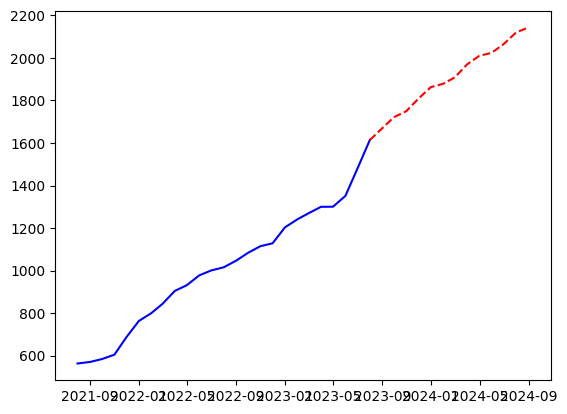

In [364]:
plt.plot(tüfe["TÜFE"].iloc[175:200], label="Gerçek Değerler", color="blue")
plt.plot(tüfe["TÜFE"].iloc[199:], label="Tahminler", color="red", linestyle="--")

In [365]:
tüfe=pd.DataFrame(tüfe["TÜFE"])
tüfe=tüfe.set_index(pd.date_range('2007-01-01','2024-09-01' , freq='1M')-pd.offsets.MonthBegin(1))
tüfe["12 Ay Önceki TÜFE"]=tüfe["TÜFE"].shift(12)
tüfe["Enflasyon"]=((tüfe["TÜFE"]/tüfe["12 Ay Önceki TÜFE"])-1)*100
tüfe=tüfe.dropna()
tüfe

,TÜFE,12 Ay Önceki TÜFE,Enflasyon
2008-01-01,146.940000,135.84,8.171378
2008-02-01,148.840000,136.42,9.104237
2008-03-01,150.270000,137.67,9.152321
2008-04-01,152.790000,139.33,9.660518
2008-05-01,155.070000,140.03,10.740556
...,...,...,...
2024-04-01,2009.588019,1300.04,54.578937
2024-05-01,2024.008986,1300.60,55.621174
2024-06-01,2064.932560,1351.59,52.778029
2024-07-01,2119.552287,1479.84,43.228477


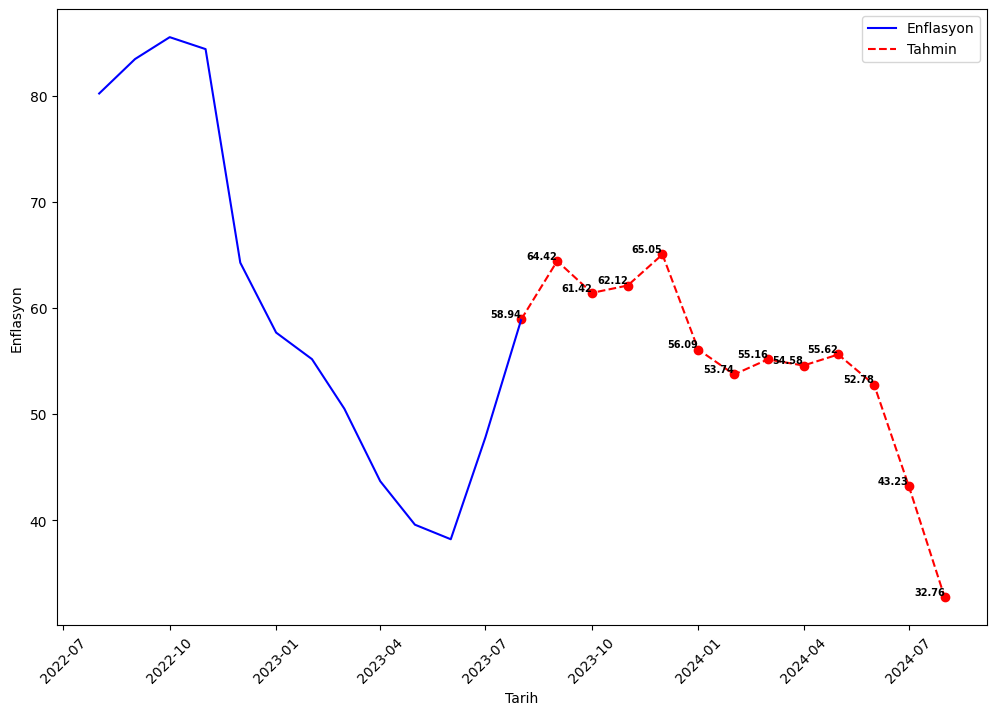

In [366]:
plt.figure(figsize=(12,8))
plt.plot(tüfe["Enflasyon"].iloc[175:188], label="Enflasyon", color="blue")
plt.plot(tüfe["Enflasyon"].iloc[187:], label="Tahmin", color="red", linestyle="--")
plt.legend()
plt.xticks(rotation=45)
for i in range(13):
    plt.scatter(tüfe.index[187+i], tüfe["Enflasyon"].iloc[187+i], color="red")
    plt.annotate(round(tüfe["Enflasyon"].iloc[187+i],2),(tüfe.index[187+i], tüfe["Enflasyon"].iloc[187+i]),fontsize=7,color="black",weight="bold",horizontalalignment='right',verticalalignment='bottom')

plt.xlabel("Tarih")
plt.ylabel("Enflasyon")
plt.show()
